In [7]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Characters dataset

In [141]:
CHARACTER_DATA_PATH = './data/character.metadata.tsv'
MOVIE_DATA_PATH = './data/movie.metadata.tsv'
SUMMARIES_DATA_PATH = './data/plot_summaries.txt'
NAME_DATA_PATH = './data/name.clusters.txt'
TYPE_DATA_PATH = './data/tvtropes.clusters.txt'

In [142]:
CHARACTER_HEADER = ['Wikipedia_movie_ID','Freebase_movie_ID','Movie_release_date','Character_name',
                    'Actor_date_of_birth','Actor_gender','Actor_height','Actor_ethnicity','Actor_name',
                    'Actor_age_at_movie_release','Freebase_character/actor_map_ID','Freebase_character_ID','Freebase_actor_ID']
character = pd.read_table(CHARACTER_DATA_PATH,header=None,names=CHARACTER_HEADER)

In [143]:
character.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [144]:
character['Actor_age_at_movie_release'] = character['Actor_age_at_movie_release'].apply(lambda x: np.nan if x < 0 else x)
character['Actor_height'] = character['Actor_height'].apply(lambda x: np.nan if x > 2.5 else x)
character['Movie_release_date'] = pd.to_datetime(character['Movie_release_date'],format='mixed',utc=True,errors='coerce').dt.year
character['Actor_date_of_birth'] = pd.to_datetime(character['Actor_date_of_birth'],format='mixed',utc=True,errors='coerce').dt.year
character.sample(5)

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID
384144,6694349,/m/0ghnkh,2006.0,George,1941.0,M,1.930,NaN,Roy Marsden,64.0,/m/02vddkw,/m/0j8p4x0,/m/0bdv1b
236629,9010968,/m/027tbnm,2007.0,NaN,1956.0,M,NaN,/m/0x67,Ruben Santiago-Hudson,50.0,/m/0cgbdy5,NaN,/m/026wcdv
397527,5837972,/m/0f88ld,2006.0,Kate Corrigan,1961.0,F,1.700,NaN,Peri Gilpin,44.0,/m/0jzb7r,/m/09h07q,/m/02frtk
184239,27527158,/m/0c01gy7,1995.0,NaN,1947.0,F,1.702,NaN,Teri Garr,47.0,/m/0g973yk,NaN,/m/02mhfy
405106,28153624,/m/0bf3b3v,2010.0,Lada,1941.0,F,NaN,NaN,Helena Buljan,68.0,/m/0cm1dtt,/m/0j5wgqd,/m/0cm1dtx


# Movies dataset

In [132]:
MOVIE_HEADER = ['Wikipedia_movie_ID','Freebase_movie_ID','Movie_name','Movie_release_date',
                'Movie_box_office_revenue','Movie_runtime','Movie_languages','Movie_countries','Movie_genres']

movie = pd.read_table(MOVIE_DATA_PATH,header=None,names=MOVIE_HEADER)
print("Number of movies : {}".format(len(movie)))

Number of movies : 81741


In [133]:
def format_dict(x):
    n = len(x)
    if n==0:
        return np.nan
    else:
        return ','.join(str(s) for s in list(x.values()))
    

try :

    movie['Movie_genres'] = movie['Movie_genres'].apply(json.loads).apply(format_dict)
    movie['Movie_countries'] = movie['Movie_countries'].apply(json.loads).apply(format_dict)
    movie['Movie_languages'] = movie['Movie_languages'].apply(json.loads).apply(format_dict)
except json.decoder.JSONDecodeError:
    print('Data has already been parsed and modified.')



In [162]:
movie.sample(5)

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
26249,5185489,/m/0d6t3j,God of Gamblers III: Back to Shanghai,1991,NaN,116.0,"Cantonese,Standard Mandarin,Standard Cantonese","Hong Kong,China","Action/Adventure,Fantasy,Comedy,World cinema,C..."
26061,21687004,/m/05mr0sv,The Stickpin,NaN,NaN,NaN,NaN,United Kingdom,"Short Film,Crime Fiction"
1374,1924191,/m/066gyt,Rampage,1988,NaN,97.0,English Language,United States of America,"Thriller,Crime Fiction,Horror,Drama"
64093,6831954,/m/0grkhm,The King and I,1999,11993021.0,90.0,English Language,United States of America,"Music,Musical,Children's,Family Film,Animation"
63516,9916253,/m/06_y8rj,Yo quiero vivir contigo,1960,NaN,NaN,Spanish Language,Argentina,Black-and-white


In [136]:
# ID of movies produced in the USA
us_movies = movie[movie['Movie_countries'].astype(str).str.contains('United States of America')]['Wikipedia_movie_ID'].unique()
print("Number of US movies : {}".format(len(us_movies)))

Number of US movies : 34408


# Keeping only actors casted in US movies

In [165]:
actors = character[character["Wikipedia_movie_ID"].isin(us_movies)]

In [169]:
print('Number of characters before filtering : {}'.format(len(character)))
print('Number of characters after filtering : {}'.format(len(actors)))

Number of characters before filtering : 450669
Number of characters after filtering : 244240


# Jaccard distance between panels of actors casted each year

In [170]:
# Group all actors that played in a movie the same year
actors_by_year = actors[actors['Actor_name']!='NaN'].groupby('Movie_release_date')['Actor_name'].unique()
actors_by_year.index = actors_by_year.index.astype(int)

# Find the years where no actor played any role in the timespan covered (1888-2016)
missing_years = []
for y in range(min(actors_by_year.index),max(actors_by_year.index)+1):
    if y not in actors_by_year.index:
        missing_years.append(y)
print(missing_years)

# Conclusion : let's do our analysis starting from year 1905

[1892, 1899, 1902, 1904]


In [175]:
jaccard = []
nb_actors = []
for y in range(1906,max(actors_by_year.index)+1):
    set1 = set(actors_by_year[y-1])
    set2 = set(actors_by_year[y])
    # Intersection length
    intersection = len(set1.intersection(set2))
    # Union length
    union = len(set1.union(set2))
    jaccard.append(1-intersection/union)
    nb_actors.append(len(set2))

Text(0.5, 1.0, 'Jaccard distance, in terms of casted actors, between one year and the previous one')

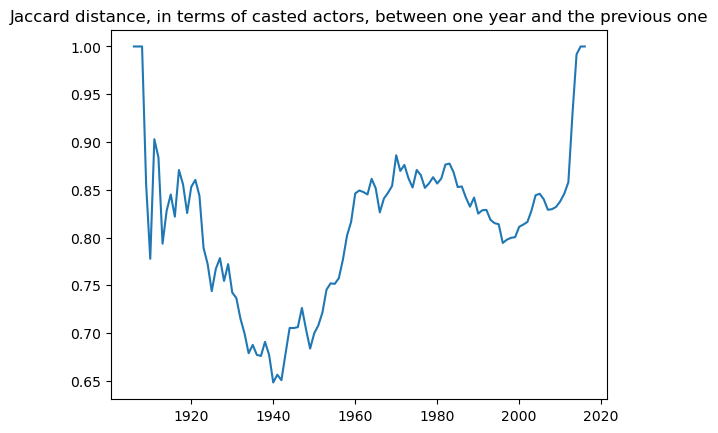

In [176]:
plt.plot(range(1906,max(actors_by_year.index)+1),jaccard)
plt.title('Jaccard distance, in terms of casted actors, between one year and the previous one')

- The Jaccard distance decreased significantly in the 1990s-2010s : the same panel of actors tended to be casted more and more in those years
- The reshuffle in casted actors reached an all-time low during WW2
- Weird behavior in the 2010s due to missing data (see next plot)
- Note : implicit assumption that the shooting time for a movie remains constant over the years. Otherwise, if movies took more time to be shot in recent years, it could mean that actors can not always shoot in movies two years in a row, resulting in an increased Jaccard distance.

Text(0.5, 1.0, 'Number of actors casted by year')

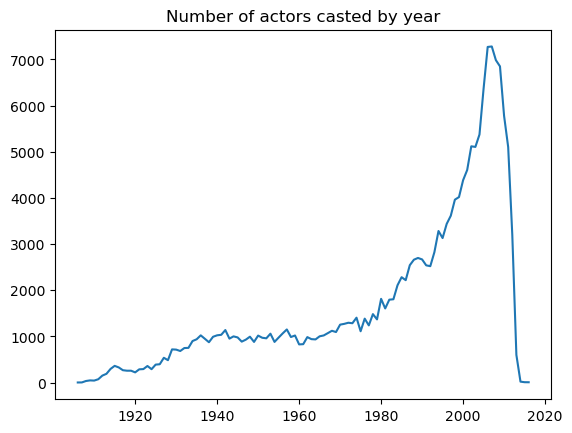

In [174]:
plt.plot(range(1906,max(actors_by_year.index)+1),nb_actors)
plt.title('Number of actors casted by year')

- Our precedent finding regarding the decrease in Jaccard distance during the 90s is all the more significant that in parallel, the number of actors present in US movies kept increasing over the years
- There is a lot of missing data in the last years of our dataset